In [320]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

In [321]:
house_train = pd.read_csv('train.csv')

house_test = pd.read_csv('test.csv')

In [322]:
#house_train.head()

In [323]:
#house_train.info()

In [324]:
house_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


$\%$ пропущенных значений в обучающем наборе

In [325]:
missing_val_train = pd.DataFrame(house_train.isnull().sum()*100/len(house_train))
missing_val_train[missing_val_train[0]>0]

,0
LotFrontage,17.739726
Alley,93.767123
MasVnrType,0.547945
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


$\%$ пропущенных значений в тестовом наборе

In [326]:
missing_val_test = pd.DataFrame(house_test.isnull().sum()*100/len(house_test))
missing_val_test[missing_val_test[0]>0]

,0
MSZoning,0.274160
LotFrontage,15.558602
Alley,92.666210
Utilities,0.137080
Exterior1st,0.068540
Exterior2nd,0.068540
MasVnrType,1.096642
MasVnrArea,1.028101
BsmtQual,3.015764
BsmtCond,3.084304


Удалим признаки, у которых $\%$ пропусков больше 50$\%$

In [327]:
id_test_column = house_test['Id']

In [328]:
columns_list = ['Id',
                'Alley', 
                'FireplaceQu', 
                'PoolQC', 
                'Fence', 
                'MiscFeature']

house_train = house_train.drop(columns_list, 
                               axis = 1)
house_test = house_test.drop(columns_list, 
                             axis = 1)

Создадим список дискретных признаков

In [329]:
numer_col = house_train.select_dtypes(exclude=['object']).columns
print(numer_col)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


Функция для заполнения пропущенных категориальных признаков значением None

In [330]:
def none_replace(dataset, fill_column):
    dataset[fill_column] = dataset[fill_column].fillna('None')

In [331]:
miss_val_list = ['MSZoning',
                    'Street',
                    'LotShape',
                    'LandContour',
                    'Utilities',
                    'LotConfig',
                    'LandSlope',
                    'Neighborhood',
                    'Condition1',
                    'Condition2',
                    'BldgType',
                    'HouseStyle',
                    'RoofStyle',
                    'RoofMatl',
                    'Exterior1st',
                    'Exterior2nd',
                    'MasVnrType',
                    'ExterQual',
                    'ExterCond',
                    'Foundation',
                    'BsmtQual',
                    'BsmtCond',
                    'BsmtExposure',
                    'BsmtFinType1',
                    'BsmtFinType2',
                    'Heating',
                    'HeatingQC',
                    'CentralAir',
                    'Electrical',
                    'KitchenQual',
                    'Functional',
                    'GarageType',
                    'GarageFinish',
                    'GarageQual',
                    'GarageCond',
                    'PavedDrive',
                    'SaleType',
                    'SaleCondition']
data = [house_train, house_test]
for i in data:
    for j in miss_val_list:
        none_replace(i, j)

Функция для заполнения пропущенных дискретных значений средним

In [332]:
def mean_value(dataset, group_column, mean_column):
    dataset[mean_column] = dataset.groupby([group_column])[mean_column].transform(lambda x: x.fillna(np.round(np.mean(x))))

In [333]:
nan_values_list = ['LotFrontage', 
                   'MasVnrArea', 
                   'GarageYrBlt', 
                   'BsmtFullBath', 
                   'BsmtHalfBath', 
                   'BsmtFinSF1',
                   'BsmtFinSF2',
                   'BsmtUnfSF',
                   'TotalBsmtSF',
                   'GarageCars',
                   'GarageArea']
data = [house_train, house_test]
for a in data:
    for b in nan_values_list:
        mean_value(a, 'MSSubClass', b)
# одно значение не заполнилось средним, т.к. оно единственное в группировке "MSSubClass"
house_test['LotFrontage'] = house_test['LotFrontage'].fillna(np.round(np.mean(house_test['LotFrontage'])))

In [334]:
object_columns = house_train.select_dtypes(include=['object']).columns

Преобразуем категориальные признаки в числовые

In [335]:
from sklearn.preprocessing import LabelEncoder
house_train[object_columns] = house_train[object_columns].apply(LabelEncoder().fit_transform)
house_test[object_columns] = house_test[object_columns].apply(LabelEncoder().fit_transform)
#house_full = pd.get_dummies(house_full, columns=object_columns, drop_first=True)

Построим графики рассеяния для числовых признаков

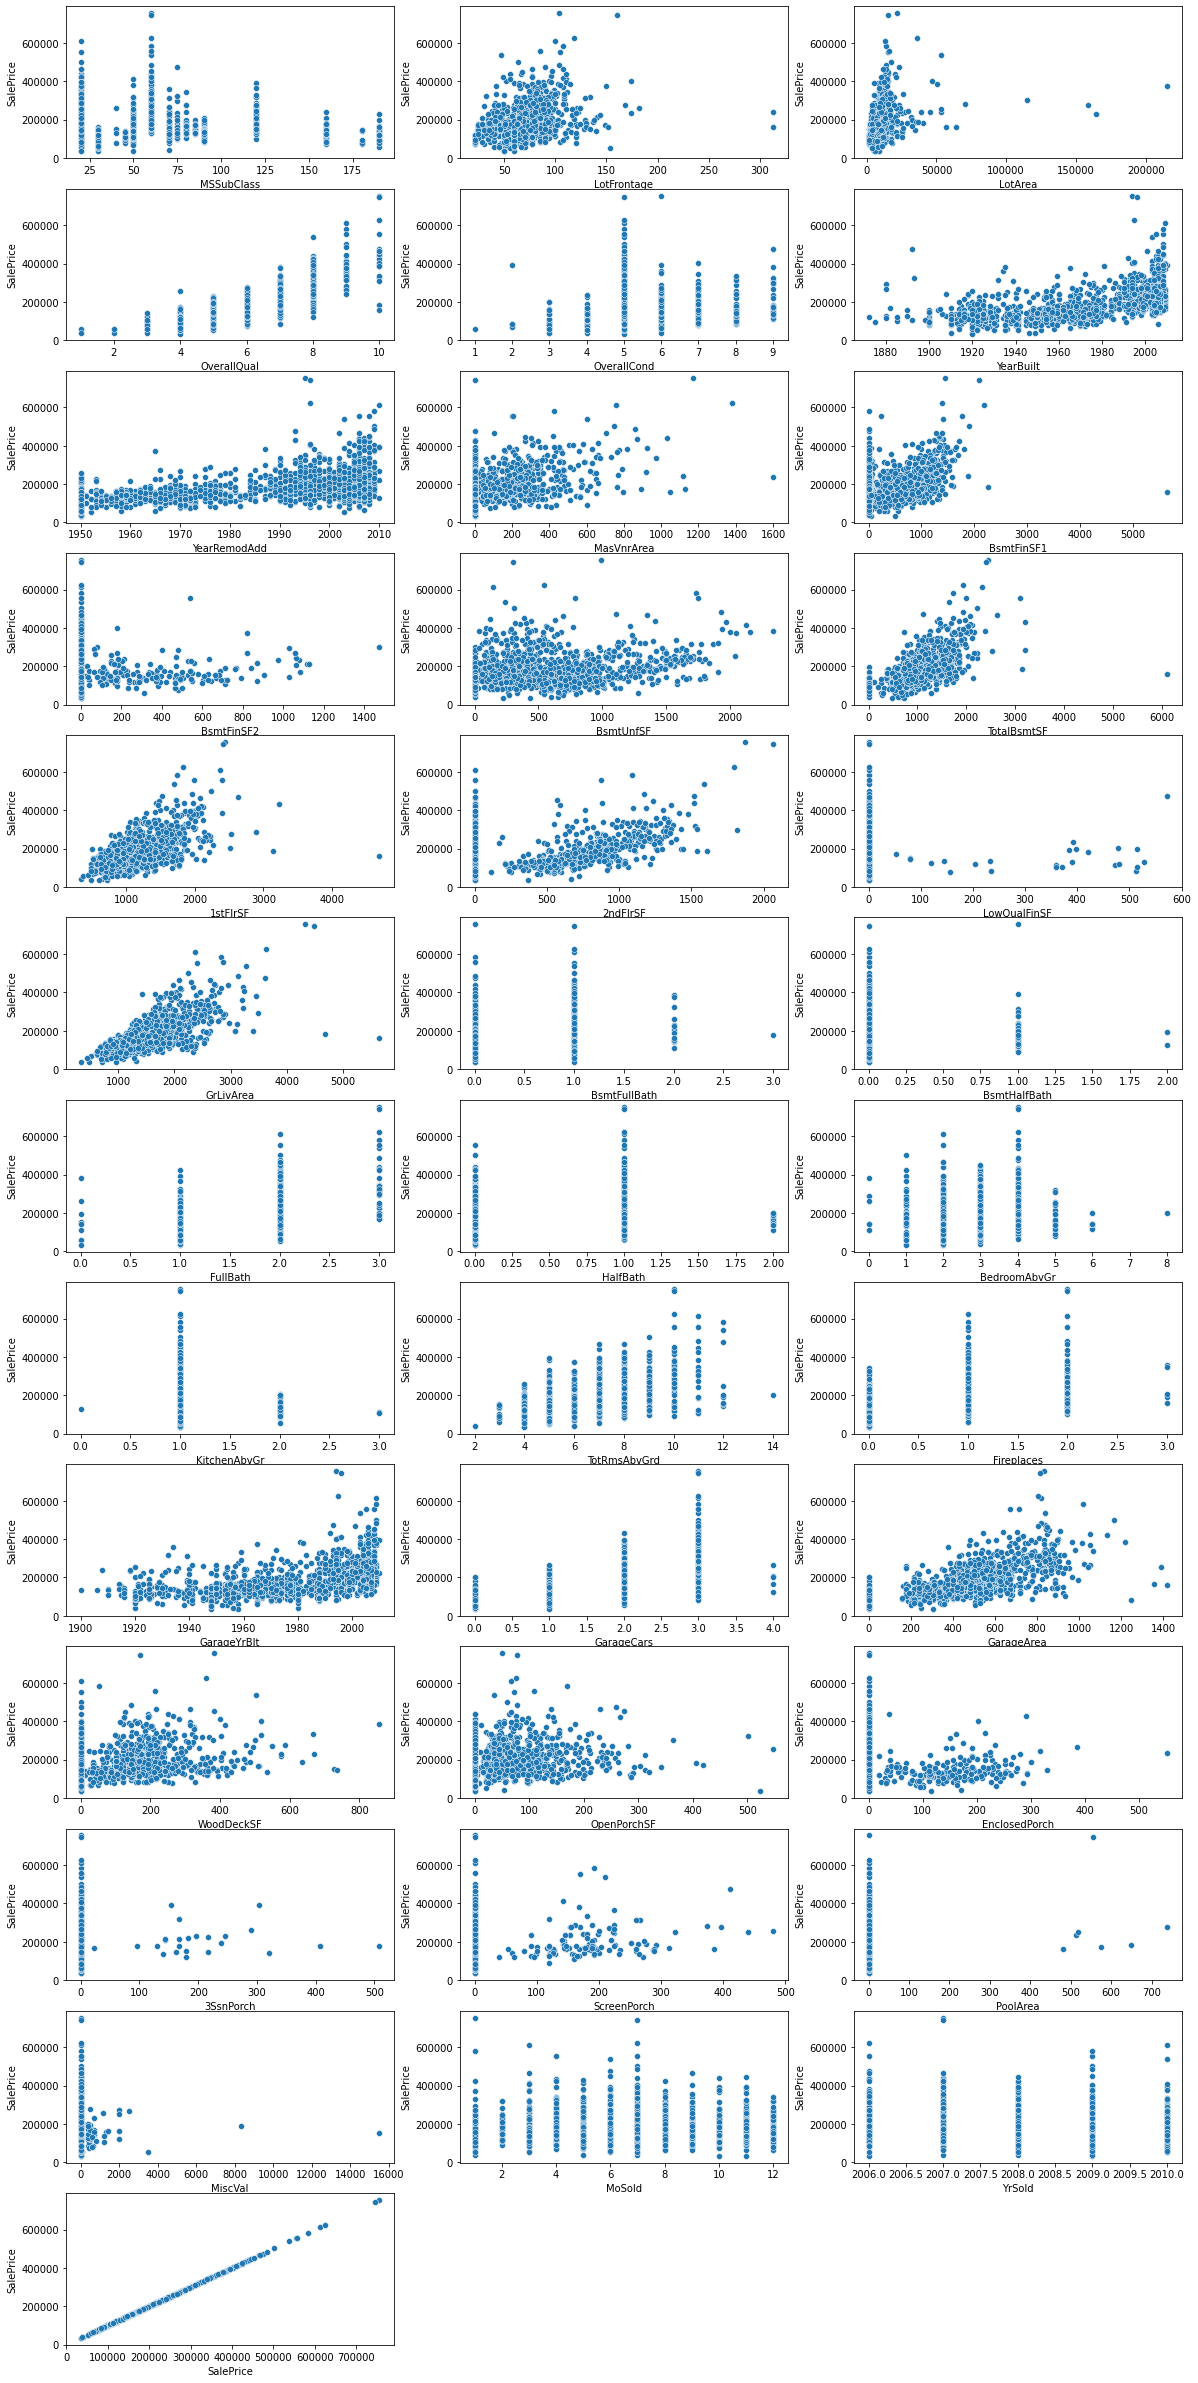

In [336]:
plt.figure(figsize=(20,100))
for i,feature in enumerate(numer_col):
    plt.subplot(30, 3, i+1)
    sns.scatterplot(data = house_train, 
                    x = feature, 
                    y = house_train['SalePrice'])

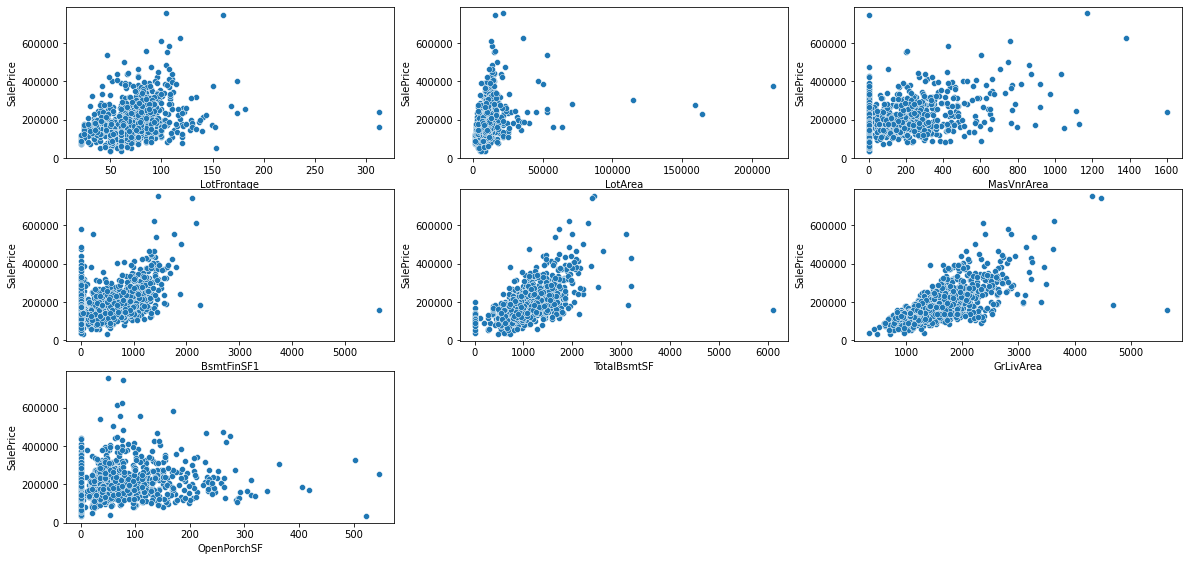

In [337]:
list_col = [house_train['LotFrontage'],
           house_train['LotArea'],
           house_train['MasVnrArea'],
           house_train['BsmtFinSF1'],
           house_train['TotalBsmtSF'],
           house_train['GrLivArea'],
           house_train['OpenPorchSF']]
plt.figure(figsize=(20,100))
for i,feature in enumerate(list_col):
    plt.subplot(30, 3, i+1)
    sns.scatterplot(data = house_train, 
                    x = feature, 
                    y = house_train['SalePrice'])

По результатам графиков рассеяния, можем заметить выбросы данных, подправим эти значения.

In [338]:
house_train.loc[(house_train['LotFrontage'] >= 175), 'LotFrontage'] = 175
house_train.loc[(house_train['LotArea'] >= 60000), 'LotArea'] = 60000
house_train.loc[(house_train['MasVnrArea'] >= 1000), 'MasVnrArea'] = 1000
house_train.loc[(house_train['BsmtFinSF1'] >= 2000), 'BsmtFinSF1'] = 2000
house_train.loc[(house_train['TotalBsmtSF'] >= 3000), 'TotalBsmtSF'] = 3000
house_train.loc[(house_train['GrLivArea'] >= 3500), 'GrLivArea'] = 3500
house_train.loc[((house_train['OpenPorchSF']>=350) & (house_train['SalePrice']<200000)), 'OpenPorchSF']=350
house_train.loc[((house_train['OpenPorchSF']>=350) & (house_train['SalePrice']<200000)), 'SalePrice']=200000

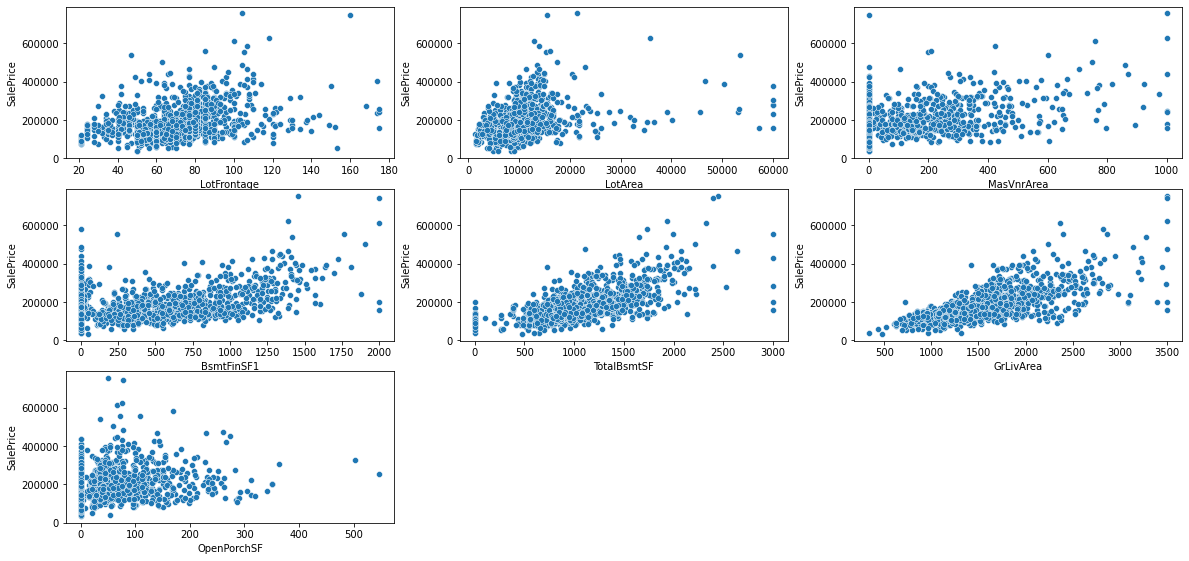

In [339]:
plt.figure(figsize=(20,100))
for i,feature in enumerate(list_col):
    plt.subplot(30, 3, i+1)
    sns.scatterplot(data = house_train, 
                    x = feature, 
                    y = house_train['SalePrice'])

Построим матрицу корреляции признаков, где коэффициент корреляции $> 0.5$

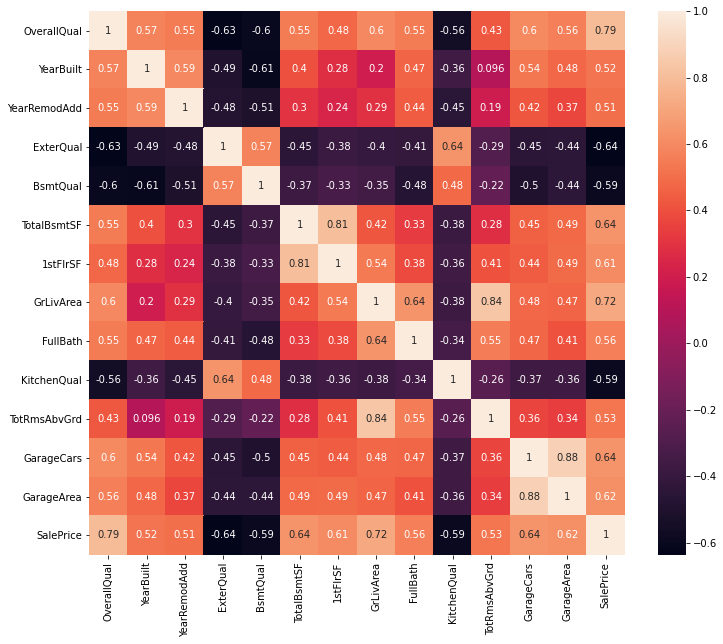

In [340]:
plt.figure(figsize=(12,10))
cor = house_train.corr()
high_corr_price = cor.index[(abs(cor['SalePrice']))>0.5]
sns.heatmap(house_train[high_corr_price].corr(),annot=True)
plt.show()

Построим график корреляции "SalePrice" с признаками в порядке убывания.

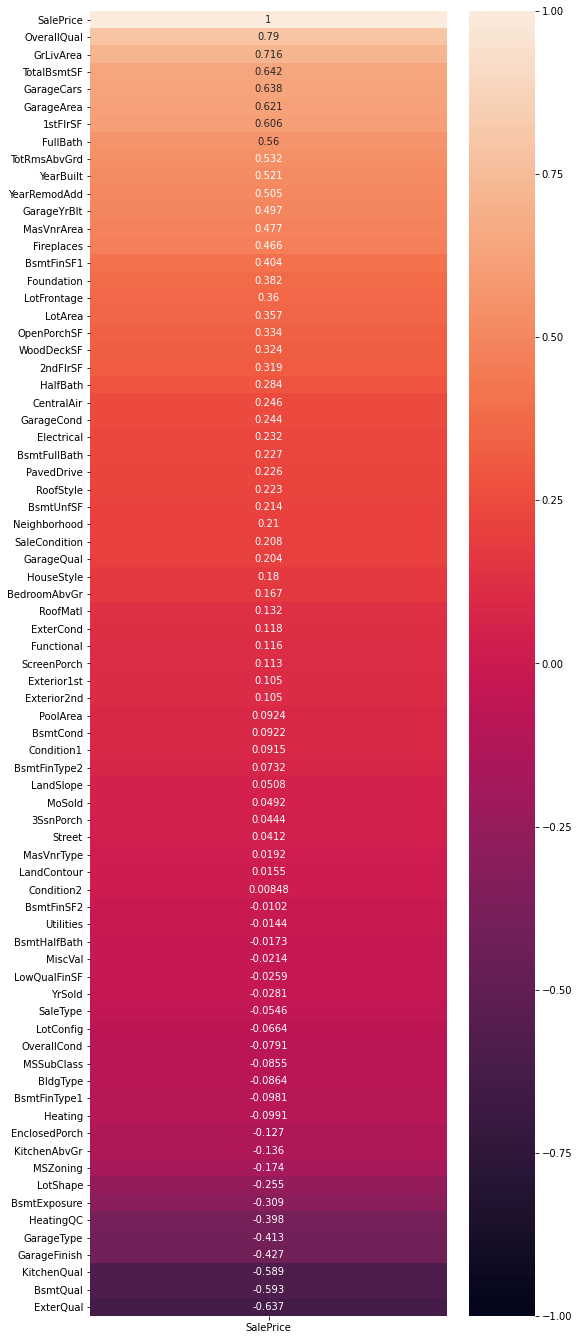

In [341]:
plt.figure(figsize=(8, 24))
sns.heatmap(house_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            vmin=-1, 
            vmax=1, 
            annot=True, 
            fmt='.3g')
plt.show()

Удалим признаки, которые коррелируют между собой.

In [342]:
house_train = house_train.drop(['GarageArea', 
                                'TotRmsAbvGrd',
                                'PoolArea'
                                ], axis=1)
house_test = house_test.drop(['GarageArea', 
                                'TotRmsAbvGrd',
                                'PoolArea'
                                ], axis=1)

Построим распределение стоимости домов

C:\Users\Filipp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Filipp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


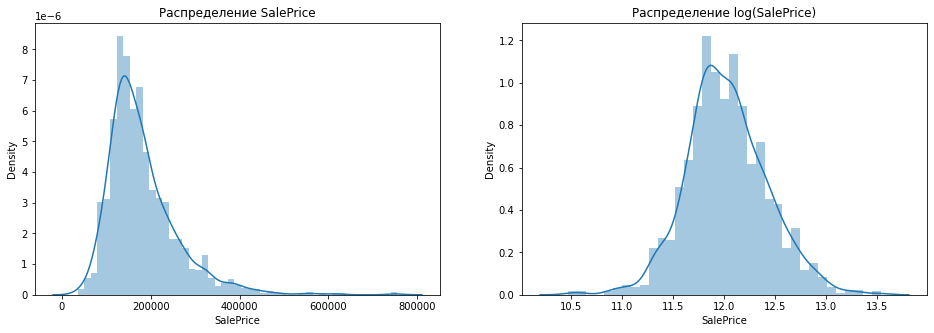

In [343]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.distplot(house_train['SalePrice'], 
             ax=ax[0])
ax[0].set_title('Распределение SalePrice')
sns.distplot(np.log(house_train['SalePrice']), 
             ax=ax[1])
ax[1].set_title('Распределение log(SalePrice)')

plt.show()

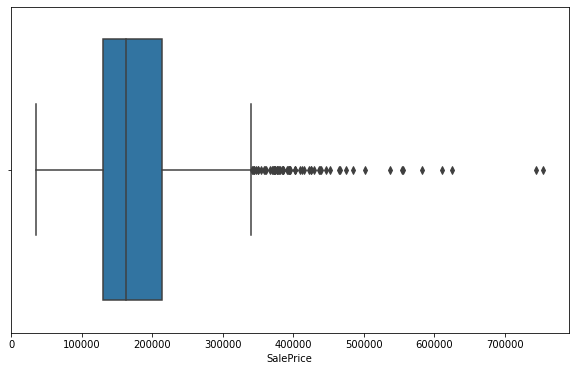

In [344]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = house_train['SalePrice'])
plt.show()

## Построение моделей

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, scorer

In [346]:
X = house_train.copy()
y = np.log(house_train['SalePrice'])


X_test_competition = house_test.copy() #Kaggle

del X['SalePrice']

Разобьем выборку на две части, где тестовая будет равна $30\%$

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 731)

Отмасштабируем данные с помощью $MinMaxScaler$

In [348]:
mmscaler = MinMaxScaler()
mmscaler.fit(X_train)

X_train = mmscaler.transform(X_train)
X_test = mmscaler.transform(X_test)

X_test_competition = mmscaler.transform(X_test_competition)

### Линейная регрессия

In [349]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

y_pred = lin_regressor.predict(X_test)
print((y_pred))

[11.57541537 12.15300004 12.22014715 11.82956207 12.27849394 12.77458895
 11.86721811 11.55056265 11.44660962 11.67542633 12.19254334 12.04268286
 12.12617987 12.40867179 11.79750696 11.66768438 11.24611956 12.06395979
 11.52450472 12.10581291 11.78679511 11.87854759 11.80196578 12.22601361
 11.87448606 11.85352083 11.55998724 11.67334759 12.07375503 12.39435788
 11.56771481 12.61693905 11.55764666 12.4689506  11.7555362  11.7131675
 12.22982869 12.07796563 12.00299447 12.11940421 12.17361782 12.72055677
 11.87563188 12.23761166 12.61544518 11.11881686 11.74014394 11.87102926
 11.85431758 11.98184427 11.8682197  11.80490058 11.82115063 11.63082503
 11.03238796 12.33074701 11.90087942 12.09224288 11.8462496  11.8903138
 11.77580022 11.90989552 11.99452135 12.44245051 11.94296186 12.12096533
 12.11688019 12.08903462 11.84416311 11.6648236  11.72569607 11.74496525
 12.08147055 11.97195372 11.81752002 11.84704092 12.62507358 11.40869927
 11.79551189 11.99426498 11.81374105 11.79464806 11.9

Качество модели на кросс-валидации

In [350]:
from sklearn.model_selection import cross_val_score

linear_cv_score = cross_val_score(lin_regressor, X, y, cv=3).mean()
linear_cv_score

0.8929020118586145

Рассчитаем качество модели

In [351]:
r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), mean_absolute_error(y_test, y_pred)

(0.894180753900113, 0.13132961183163866, 0.0879133889641691)

Предскажем SalePrice на данных для соревнования Kaggle

In [239]:
y_pred_competition_lr = np.exp(lin_regressor.predict(X_test_competition))

In [240]:
subm_lr = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_competition_lr})
subm_lr.to_csv('submission.csv', index=False)

### Ridge регрессия

Посмотрим на $R^2$ и $MSE$ при разных значениях $a$ при $L2$-регуляризации

In [352]:
from sklearn.linear_model import Ridge

for a in np.arange(0.1,100.1,25):
    print('alpha=',a)
    lin_reg_ridge = Ridge(alpha=a)
    lin_reg_ridge.fit(X_train, y_train)
    y_pred_lr_ridge = lin_reg_ridge.predict(X_test)
    print('Scores:', r2_score(y_test, y_pred_lr_ridge), np.sqrt(mean_squared_error(y_test, y_pred_lr_ridge)))

alpha= 0.1
Scores: 0.8997979599416727 0.1277963973160514
alpha= 25.1
Scores: 0.8638115954425504 0.14898769292555133
alpha= 50.1
Scores: 0.833179093857906 0.16489427100170098
alpha= 75.1
Scores: 0.807494403049961 0.17713403246312812


Подберем оптимальное значение параметра регуляризации $a$ по кросс-валидации 

In [353]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [354]:
print('Оптимальное значение параметра регуляризации:', ridge_cv.alpha_)

Оптимальное значение параметра регуляризации: 1.625755666443795


In [355]:
lin_reg_ridge = Ridge(alpha=ridge_cv.alpha_)
lin_reg_ridge.fit(X_train, y_train)

y_pred_lr_ridge = lin_reg_ridge.predict(X_test)

print('Scores:', r2_score(y_test,y_pred_lr_ridge), np.sqrt(mean_squared_error(y_test,y_pred_lr_ridge)))

Scores: 0.8996162938875931 0.12791219213410904


In [356]:
ridge_cv_score = cross_val_score(lin_reg_ridge, X, y, cv=3).mean()
ridge_cv_score

0.892990806321387

Предскажем SalePrice на данных для соревнования Kaggle

In [357]:
y_pred_competition_lr_ridge = np.exp(lin_reg_ridge.predict(X_test_competition))

In [358]:
subm_lr_ridge = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_competition_lr_ridge})
subm_lr_ridge.to_csv('submission.csv', index=False)

### Метод ближайших соседей(регрессия)

In [359]:
from sklearn.neighbors import KNeighborsRegressor

In [360]:
for i in range (1,10):
    kreg = KNeighborsRegressor(n_neighbors=i, weights='uniform', algorithm='auto') 
    kreg.fit(X_train, y_train)
    ypred_knn=kreg.predict(X_test)
    print('neighbors:', i)
    print('Scores:', r2_score(y_test,ypred_knn), np.sqrt(mean_squared_error(y_test,ypred_knn)))

neighbors: 1
Scores: 0.6185529641515712 0.2493431555024031
neighbors: 2
Scores: 0.6928667443798322 0.22374006026698182
neighbors: 3
Scores: 0.7185746828056193 0.21417161481906488
neighbors: 4
Scores: 0.7285760299448406 0.2103315529255281
neighbors: 5
Scores: 0.7260971654689932 0.2112898293728146
neighbors: 6
Scores: 0.7293069051004184 0.21004817756216398
neighbors: 7
Scores: 0.7305691210103511 0.2095578881094676
neighbors: 8
Scores: 0.7269632223180476 0.2109555249065478
neighbors: 9
Scores: 0.727664913986553 0.21068427763593045


In [361]:
knn_reg = KNeighborsRegressor(n_neighbors=7, weights='uniform', algorithm='auto')
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [362]:
knn_cv_score = cross_val_score(knn_reg, X, y, cv=3).mean()
knn_cv_score

0.6537621823590508

In [363]:
y_pred_knn = kreg.predict(X_test)

In [364]:
r2_score(y_test, y_pred_knn), np.sqrt(mean_squared_error(y_test, y_pred_knn))

(0.727664913986553, 0.21068427763593045)

In [365]:
y_pred_knn_comp = np.exp(kreg.predict(X_test_competition))

In [366]:
subm_knn_reg = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_knn_comp})
subm_knn_reg.to_csv('submission.csv', index=False)

### Случайный лес

In [367]:
from sklearn.ensemble import RandomForestRegressor

Найдем оптимальное количество деревьев

In [52]:
# from tqdm import tqdm

# r2_list = []

# n_list = np.arange(10,1500,100)

# for n in tqdm(n_list):
#     print('n_estimators:', n)
#     model_randf = RandomForestRegressor(n_estimators=n)
#     score = cross_val_score(model_randf, X, y, cv=3, scoring='r2').mean()
#     r2_list.append(score)
#     print('r2:', score)

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

n_estimators: 10


  7%|█████▌                                                                             | 1/15 [00:00<00:03,  3.90it/s]

r2: 0.8448152102214955
n_estimators: 110


 13%|███████████                                                                        | 2/15 [00:02<00:12,  1.04it/s]

r2: 0.8629734885628885
n_estimators: 210


 20%|████████████████▌                                                                  | 3/15 [00:07<00:25,  2.14s/it]

r2: 0.8656337788978029
n_estimators: 310


 27%|██████████████████████▏                                                            | 4/15 [00:15<00:40,  3.68s/it]

r2: 0.8656348794903376
n_estimators: 410


 33%|███████████████████████████▋                                                       | 5/15 [00:24<00:54,  5.48s/it]

r2: 0.8653348768068071
n_estimators: 510


 40%|█████████████████████████████████▏                                                 | 6/15 [00:36<01:06,  7.40s/it]

r2: 0.8666842302883166
n_estimators: 610


 47%|██████████████████████████████████████▋                                            | 7/15 [00:50<01:15,  9.46s/it]

r2: 0.8652744973211863
n_estimators: 710


 53%|████████████████████████████████████████████▎                                      | 8/15 [01:07<01:20, 11.55s/it]

r2: 0.8661586169912493
n_estimators: 810


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [01:26<01:22, 13.78s/it]

r2: 0.866843429320339
n_estimators: 910


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [01:47<01:20, 16.02s/it]

r2: 0.8669167057068344
n_estimators: 1010


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [02:11<01:13, 18.29s/it]

r2: 0.8654504102933749
n_estimators: 1110


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [02:37<01:01, 20.61s/it]

r2: 0.8647010377019471
n_estimators: 1210


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [03:05<00:45, 22.88s/it]

r2: 0.8663260514676834
n_estimators: 1310


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [03:35<00:25, 25.09s/it]

r2: 0.8663488111558205
n_estimators: 1410


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [04:08<00:00, 16.55s/it]

r2: 0.8661484133437352


График качества алгоритма в зависимости от количества деревьев

Populating the interactive namespace from numpy and matplotlib


C:\Users\Filipp\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


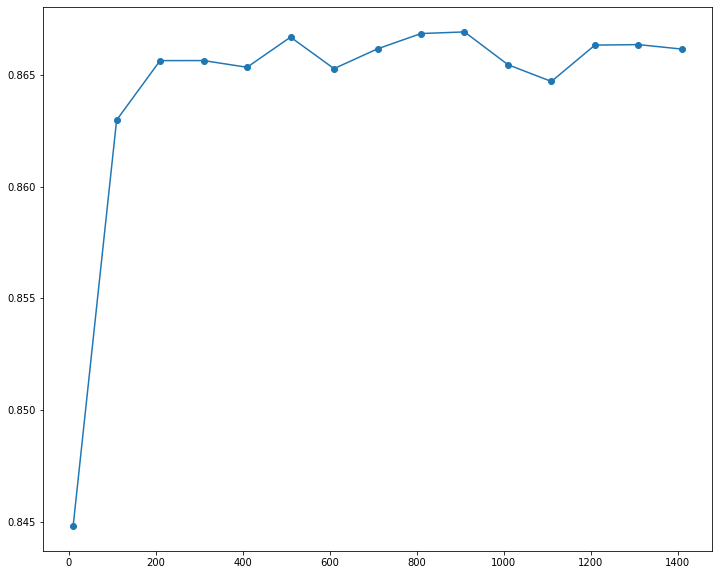

In [53]:
# from matplotlib import pylab as plt
# %pylab inline
# plt.figure(figsize=(12,10))
# plot(n_list, r2_list, '-o')
# plt.show()

Оптимальное количество

In [54]:
# n_list[r2_list.index(max(r2_list))]

910

Подберем max_depth и max_features с помощью функции GridSearchCV

In [46]:
# from sklearn.model_selection import GridSearchCV

# model_randf = RandomForestRegressor(n_estimators=910, n_jobs=-1, random_state=731)

# params = {'max_features': [None, 'log2', 'sqrt'], 
#           'max_depth': [2, 4, 6, 8, 10, 20, 50]}

# gs_rf = GridSearchCV(model_randf,
#                   params,
#                   cv=3,
#                   scoring='r2',
#                   n_jobs=-1)
# gs_rf.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=910, n_jobs=-1,
           oob_score=False, random_state=731, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [47]:
# gs_rf.best_estimator_, gs_rf.best_score_

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=910, n_jobs=-1,
            oob_score=False, random_state=731, verbose=0, warm_start=False),
 0.8718341383926748)

In [368]:
gs_rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=910, n_jobs=-1,
            oob_score=False, random_state=731, verbose=0, warm_start=False)

In [369]:
ranfor_cv_score = cross_val_score(gs_rf, X, y, cv=3).mean()
ranfor_cv_score

0.8705905971656113

Обучение

In [370]:
gs_rf.fit(X_train, y_train)
y_pred_rand_for = gs_rf.predict(X_test)

In [371]:
print('Scores:', r2_score(y_test,y_pred_rand_for), np.sqrt(mean_squared_error(y_test,y_pred_rand_for)))

Scores: 0.8722758600109092 0.1442835511046737


Предскажем SalePrice на данных для соревнования Kaggle

In [265]:
y_pred_rand_for_comp = np.exp(gs_rf.predict(X_test_competition))

In [266]:
subm_rand_for = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_rand_for_comp})
subm_rand_for.to_csv('submission.csv', index=False)

### LightGBM

In [372]:
import lightgbm as lgb

In [268]:
# estimator = lgb.LGBMRegressor(num_leaves=10)
# n_est = np.arange(10,2000,100)
# rate = np.arange(0.01,0.1,0.005)

# param_grid = {
#     'learning_rate': rate,
#     'n_estimators': n_est
# }

# # gbm = GridSearchCV(estimator, param_grid, cv=3)
# gbm.fit(X_train, y_train)

# print('Best parameters found by grid search are:', gbm.best_params_)

In [269]:
# y_pred_gbm = gbm.predict(X_test)

In [270]:
# print('Scores:', r2_score(y_test,y_pred_gbm), np.sqrt(mean_squared_error(y_test,y_pred_gbm)))

In [373]:
gbm = lgb.LGBMRegressor(num_leaves=10, learning_rate = 0.03, n_estimators = 510)

In [374]:
lgbm_cv_score = cross_val_score(gbm, X, y, cv=3).mean()
lgbm_cv_score

0.8901953353677855

In [375]:
gbm.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.03, n_estimators=510, num_leaves=10)

In [376]:
y_pred_gbm = gbm.predict(X_test)

In [377]:
print('Scores:', r2_score(y_test,y_pred_gbm), np.sqrt(mean_squared_error(y_test,y_pred_gbm)))

Scores: 0.8953466394815867 0.1306041323423355


Предскажем SalePrice на данных для соревнования Kaggle

In [276]:
y_pred_gbm_comp = np.exp(gbm.predict(X_test_competition))

In [277]:
subm_gbm = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_gbm_comp})
subm_gbm.to_csv('submission_gbm.csv', index=False)

### XGBoost

In [378]:
from xgboost import XGBRegressor

In [379]:
xgbr_model = XGBRegressor(reg_alpha=0.2,  n_estimators=500, learning_rate=0.2)

In [380]:
xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [381]:
xgb_cv_score = cross_val_score(xgbr_model, X, y, cv=3).mean()
xgb_cv_score

C:\Users\Filipp\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Filipp\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Filipp\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.875230916779004

In [382]:
y_pred_xgb = xgbr_model.predict(X_test)

C:\Users\Filipp\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [383]:
print('Scores:', r2_score(y_test,y_pred_xgb), np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

Scores: 0.8692997748684131 0.14595483856275246


In [284]:
y_pred_xgb_comp = np.exp(xgbr_model.predict(X_test_competition))

C:\Users\Filipp\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [285]:
subm_xgb = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_xgb_comp})
subm_xgb.to_csv('submission_xgb.csv', index=False)

### Градиентный бустинг

In [454]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(n_estimators=90)
grad_boost.fit(X_train, y_train)
y_pred_gb = grad_boost.predict(X_test)


In [455]:
gradboost_cv_score = cross_val_score(grad_boost, X, y, cv=3).mean()
gradboost_cv_score

0.8852048519689083

In [456]:
print('Scores:', r2_score(y_test,y_pred_gb), np.sqrt(mean_squared_error(y_test,y_pred_gb)))

Scores: 0.9008279247662073 0.12713789882169566


In [289]:
y_pred_GB_comp = np.exp(grad_boost.predict(X_test_competition))

In [290]:
subm_GB = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_GB_comp})
subm_GB.to_csv('submission_GB.csv', index=False)

In [295]:
# from sklearn.model_selection import GridSearchCV
# learning_rate_list = np.arange(0.01,0.05,0.02)
# subsam_list = np.arange(0.1,0.5,0.2)
# min_samples_split_list = np.arange(10,20,5)
# min_samples_leaf_list = np.arange(10,20,5)

# model_grad_boost = GradientBoostingRegressor()

# params = {'loss': ['ls', 'lad', 'huber', 'quantile'], 
#         'n_estimators': [50, 100, 150], 
#         'learning_rate': learning_rate_list, 
#           'subsample': subsam_list,
#          'min_samples_split': min_samples_split_list,
#          'min_samples_leaf': min_samples_leaf_list}

# gs_grad_boost = GridSearchCV(model_grad_boost,
#                   params,
#                   cv=3)
# gs_grad_boost.fit(X, y)

KeyboardInterrupt: 

In [ ]:
# gs_grad_boost.best_estimator_, gs_grad_boost.best_score_

### CatBoost

In [296]:
from catboost import CatBoostRegressor

np.random.seed(42)
cat_boost_model = CatBoostRegressor()
cat_boost_model.fit(X_train, y_train)
y_pred_cb = cat_boost_model.predict(X_test)

Learning rate set to 0.039182
0:	learn: 0.3846332	total: 8.02ms	remaining: 8.02s
1:	learn: 0.3756978	total: 9.86ms	remaining: 4.92s
2:	learn: 0.3667458	total: 11.5ms	remaining: 3.81s
3:	learn: 0.3577992	total: 13.2ms	remaining: 3.3s
4:	learn: 0.3493151	total: 15.1ms	remaining: 3s
5:	learn: 0.3417033	total: 17ms	remaining: 2.81s
6:	learn: 0.3345473	total: 18.8ms	remaining: 2.66s
7:	learn: 0.3262897	total: 20.6ms	remaining: 2.56s
8:	learn: 0.3189558	total: 22.5ms	remaining: 2.47s
9:	learn: 0.3120569	total: 24.3ms	remaining: 2.4s
10:	learn: 0.3061323	total: 25.9ms	remaining: 2.33s
11:	learn: 0.2996184	total: 27.6ms	remaining: 2.27s
12:	learn: 0.2940049	total: 29.2ms	remaining: 2.22s
13:	learn: 0.2880850	total: 30.8ms	remaining: 2.17s
14:	learn: 0.2819985	total: 32.3ms	remaining: 2.12s
15:	learn: 0.2761056	total: 34ms	remaining: 2.09s
16:	learn: 0.2704661	total: 35.5ms	remaining: 2.05s
17:	learn: 0.2653759	total: 36.9ms	remaining: 2.01s
18:	learn: 0.2598619	total: 38.5ms	remaining: 1.99s
1

219:	learn: 0.0919486	total: 328ms	remaining: 1.16s
220:	learn: 0.0917282	total: 329ms	remaining: 1.16s
221:	learn: 0.0915204	total: 330ms	remaining: 1.16s
222:	learn: 0.0913658	total: 332ms	remaining: 1.16s
223:	learn: 0.0912344	total: 333ms	remaining: 1.15s
224:	learn: 0.0911944	total: 334ms	remaining: 1.15s
225:	learn: 0.0910893	total: 335ms	remaining: 1.15s
226:	learn: 0.0909327	total: 337ms	remaining: 1.15s
227:	learn: 0.0907310	total: 338ms	remaining: 1.14s
228:	learn: 0.0906914	total: 339ms	remaining: 1.14s
229:	learn: 0.0905862	total: 340ms	remaining: 1.14s
230:	learn: 0.0903331	total: 341ms	remaining: 1.14s
231:	learn: 0.0901820	total: 343ms	remaining: 1.13s
232:	learn: 0.0900236	total: 344ms	remaining: 1.13s
233:	learn: 0.0898628	total: 345ms	remaining: 1.13s
234:	learn: 0.0896966	total: 346ms	remaining: 1.13s
235:	learn: 0.0895439	total: 347ms	remaining: 1.12s
236:	learn: 0.0893886	total: 349ms	remaining: 1.12s
237:	learn: 0.0892379	total: 350ms	remaining: 1.12s
238:	learn: 

480:	learn: 0.0619908	total: 651ms	remaining: 702ms
481:	learn: 0.0618913	total: 652ms	remaining: 701ms
482:	learn: 0.0618784	total: 653ms	remaining: 699ms
483:	learn: 0.0617730	total: 654ms	remaining: 698ms
484:	learn: 0.0616466	total: 656ms	remaining: 696ms
485:	learn: 0.0616363	total: 657ms	remaining: 695ms
486:	learn: 0.0615410	total: 658ms	remaining: 693ms
487:	learn: 0.0614392	total: 659ms	remaining: 692ms
488:	learn: 0.0614179	total: 661ms	remaining: 690ms
489:	learn: 0.0613815	total: 662ms	remaining: 689ms
490:	learn: 0.0613493	total: 663ms	remaining: 687ms
491:	learn: 0.0612868	total: 664ms	remaining: 686ms
492:	learn: 0.0612760	total: 665ms	remaining: 684ms
493:	learn: 0.0612343	total: 667ms	remaining: 683ms
494:	learn: 0.0610961	total: 668ms	remaining: 681ms
495:	learn: 0.0610282	total: 669ms	remaining: 680ms
496:	learn: 0.0609292	total: 670ms	remaining: 678ms
497:	learn: 0.0608569	total: 671ms	remaining: 677ms
498:	learn: 0.0607246	total: 673ms	remaining: 675ms
499:	learn: 

726:	learn: 0.0458640	total: 979ms	remaining: 368ms
727:	learn: 0.0458602	total: 980ms	remaining: 366ms
728:	learn: 0.0457742	total: 982ms	remaining: 365ms
729:	learn: 0.0457699	total: 983ms	remaining: 363ms
730:	learn: 0.0457120	total: 984ms	remaining: 362ms
731:	learn: 0.0456774	total: 985ms	remaining: 361ms
732:	learn: 0.0456298	total: 987ms	remaining: 359ms
733:	learn: 0.0455939	total: 988ms	remaining: 358ms
734:	learn: 0.0455905	total: 989ms	remaining: 357ms
735:	learn: 0.0455109	total: 990ms	remaining: 355ms
736:	learn: 0.0454620	total: 992ms	remaining: 354ms
737:	learn: 0.0453868	total: 993ms	remaining: 352ms
738:	learn: 0.0452785	total: 994ms	remaining: 351ms
739:	learn: 0.0452746	total: 995ms	remaining: 350ms
740:	learn: 0.0452458	total: 997ms	remaining: 348ms
741:	learn: 0.0451715	total: 998ms	remaining: 347ms
742:	learn: 0.0451266	total: 999ms	remaining: 346ms
743:	learn: 0.0450798	total: 1s	remaining: 344ms
744:	learn: 0.0450191	total: 1s	remaining: 343ms
745:	learn: 0.0449

962:	learn: 0.0352229	total: 1.31s	remaining: 50.3ms
963:	learn: 0.0351568	total: 1.31s	remaining: 48.9ms
964:	learn: 0.0350942	total: 1.31s	remaining: 47.5ms
965:	learn: 0.0350705	total: 1.31s	remaining: 46.2ms
966:	learn: 0.0350361	total: 1.31s	remaining: 44.8ms
967:	learn: 0.0349944	total: 1.31s	remaining: 43.4ms
968:	learn: 0.0349565	total: 1.31s	remaining: 42.1ms
969:	learn: 0.0349543	total: 1.32s	remaining: 40.7ms
970:	learn: 0.0349339	total: 1.32s	remaining: 39.4ms
971:	learn: 0.0348919	total: 1.32s	remaining: 38ms
972:	learn: 0.0348342	total: 1.32s	remaining: 36.6ms
973:	learn: 0.0347934	total: 1.32s	remaining: 35.3ms
974:	learn: 0.0347581	total: 1.32s	remaining: 33.9ms
975:	learn: 0.0346867	total: 1.32s	remaining: 32.6ms
976:	learn: 0.0346635	total: 1.32s	remaining: 31.2ms
977:	learn: 0.0346544	total: 1.33s	remaining: 29.8ms
978:	learn: 0.0346159	total: 1.33s	remaining: 28.5ms
979:	learn: 0.0345740	total: 1.33s	remaining: 27.1ms
980:	learn: 0.0345234	total: 1.33s	remaining: 25

In [297]:
catboost_cv_score = cross_val_score(cat_boost_model, X, y, cv=3).mean()
catboost_cv_score

Learning rate set to 0.038841
0:	learn: 0.3852452	total: 30.5ms	remaining: 30.5s
1:	learn: 0.3773934	total: 32.8ms	remaining: 16.4s
2:	learn: 0.3678214	total: 35.1ms	remaining: 11.7s
3:	learn: 0.3598356	total: 37.7ms	remaining: 9.39s
4:	learn: 0.3517684	total: 39.9ms	remaining: 7.94s
5:	learn: 0.3438372	total: 42ms	remaining: 6.96s
6:	learn: 0.3361442	total: 44.4ms	remaining: 6.3s
7:	learn: 0.3290904	total: 46.8ms	remaining: 5.8s
8:	learn: 0.3223798	total: 48.9ms	remaining: 5.38s
9:	learn: 0.3154017	total: 50.7ms	remaining: 5.02s
10:	learn: 0.3090113	total: 52.4ms	remaining: 4.71s
11:	learn: 0.3020772	total: 53.9ms	remaining: 4.44s
12:	learn: 0.2959753	total: 55.5ms	remaining: 4.21s
13:	learn: 0.2896571	total: 57.1ms	remaining: 4.02s
14:	learn: 0.2835636	total: 58.7ms	remaining: 3.85s
15:	learn: 0.2785307	total: 60.2ms	remaining: 3.7s
16:	learn: 0.2730481	total: 61.6ms	remaining: 3.56s
17:	learn: 0.2680806	total: 63ms	remaining: 3.44s
18:	learn: 0.2630697	total: 64.5ms	remaining: 3.33s

165:	learn: 0.1009339	total: 246ms	remaining: 1.24s
166:	learn: 0.1006606	total: 248ms	remaining: 1.23s
167:	learn: 0.1005082	total: 249ms	remaining: 1.23s
168:	learn: 0.1002593	total: 250ms	remaining: 1.23s
169:	learn: 0.1000689	total: 251ms	remaining: 1.23s
170:	learn: 0.0998919	total: 252ms	remaining: 1.22s
171:	learn: 0.0998454	total: 254ms	remaining: 1.22s
172:	learn: 0.0996421	total: 255ms	remaining: 1.22s
173:	learn: 0.0992786	total: 256ms	remaining: 1.22s
174:	learn: 0.0991688	total: 257ms	remaining: 1.21s
175:	learn: 0.0990614	total: 258ms	remaining: 1.21s
176:	learn: 0.0988238	total: 260ms	remaining: 1.21s
177:	learn: 0.0987209	total: 261ms	remaining: 1.2s
178:	learn: 0.0985312	total: 262ms	remaining: 1.2s
179:	learn: 0.0984218	total: 263ms	remaining: 1.2s
180:	learn: 0.0981971	total: 265ms	remaining: 1.2s
181:	learn: 0.0979662	total: 266ms	remaining: 1.19s
182:	learn: 0.0977867	total: 267ms	remaining: 1.19s
183:	learn: 0.0975514	total: 268ms	remaining: 1.19s
184:	learn: 0.09

370:	learn: 0.0685308	total: 491ms	remaining: 833ms
371:	learn: 0.0683836	total: 492ms	remaining: 831ms
372:	learn: 0.0683650	total: 493ms	remaining: 830ms
373:	learn: 0.0682495	total: 495ms	remaining: 828ms
374:	learn: 0.0681499	total: 496ms	remaining: 827ms
375:	learn: 0.0680406	total: 497ms	remaining: 825ms
376:	learn: 0.0678888	total: 499ms	remaining: 824ms
377:	learn: 0.0677508	total: 500ms	remaining: 822ms
378:	learn: 0.0676590	total: 501ms	remaining: 821ms
379:	learn: 0.0675192	total: 502ms	remaining: 819ms
380:	learn: 0.0675025	total: 503ms	remaining: 818ms
381:	learn: 0.0674707	total: 504ms	remaining: 816ms
382:	learn: 0.0672679	total: 506ms	remaining: 814ms
383:	learn: 0.0671470	total: 507ms	remaining: 813ms
384:	learn: 0.0669436	total: 508ms	remaining: 811ms
385:	learn: 0.0668123	total: 509ms	remaining: 810ms
386:	learn: 0.0666472	total: 510ms	remaining: 808ms
387:	learn: 0.0665251	total: 511ms	remaining: 807ms
388:	learn: 0.0664167	total: 513ms	remaining: 805ms
389:	learn: 

577:	learn: 0.0516214	total: 736ms	remaining: 538ms
578:	learn: 0.0515598	total: 737ms	remaining: 536ms
579:	learn: 0.0515099	total: 739ms	remaining: 535ms
580:	learn: 0.0514127	total: 740ms	remaining: 534ms
581:	learn: 0.0513221	total: 741ms	remaining: 532ms
582:	learn: 0.0512451	total: 743ms	remaining: 531ms
583:	learn: 0.0511683	total: 744ms	remaining: 530ms
584:	learn: 0.0510600	total: 745ms	remaining: 529ms
585:	learn: 0.0509965	total: 747ms	remaining: 527ms
586:	learn: 0.0509286	total: 748ms	remaining: 526ms
587:	learn: 0.0508373	total: 749ms	remaining: 525ms
588:	learn: 0.0508222	total: 751ms	remaining: 524ms
589:	learn: 0.0507374	total: 752ms	remaining: 523ms
590:	learn: 0.0506759	total: 753ms	remaining: 521ms
591:	learn: 0.0505990	total: 755ms	remaining: 520ms
592:	learn: 0.0505392	total: 756ms	remaining: 519ms
593:	learn: 0.0505269	total: 757ms	remaining: 518ms
594:	learn: 0.0504454	total: 758ms	remaining: 516ms
595:	learn: 0.0503568	total: 760ms	remaining: 515ms
596:	learn: 

776:	learn: 0.0401949	total: 981ms	remaining: 281ms
777:	learn: 0.0401517	total: 982ms	remaining: 280ms
778:	learn: 0.0400524	total: 983ms	remaining: 279ms
779:	learn: 0.0399979	total: 984ms	remaining: 278ms
780:	learn: 0.0399394	total: 986ms	remaining: 276ms
781:	learn: 0.0398676	total: 987ms	remaining: 275ms
782:	learn: 0.0398224	total: 988ms	remaining: 274ms
783:	learn: 0.0397860	total: 990ms	remaining: 273ms
784:	learn: 0.0397302	total: 991ms	remaining: 271ms
785:	learn: 0.0396872	total: 992ms	remaining: 270ms
786:	learn: 0.0396418	total: 993ms	remaining: 269ms
787:	learn: 0.0396069	total: 995ms	remaining: 268ms
788:	learn: 0.0395507	total: 996ms	remaining: 266ms
789:	learn: 0.0394869	total: 997ms	remaining: 265ms
790:	learn: 0.0394568	total: 998ms	remaining: 264ms
791:	learn: 0.0394319	total: 1000ms	remaining: 262ms
792:	learn: 0.0393911	total: 1s	remaining: 261ms
793:	learn: 0.0393292	total: 1s	remaining: 260ms
794:	learn: 0.0392739	total: 1s	remaining: 259ms
795:	learn: 0.039231

976:	learn: 0.0316289	total: 1.23s	remaining: 28.8ms
977:	learn: 0.0315913	total: 1.23s	remaining: 27.6ms
978:	learn: 0.0315617	total: 1.23s	remaining: 26.3ms
979:	learn: 0.0315167	total: 1.23s	remaining: 25.1ms
980:	learn: 0.0314381	total: 1.23s	remaining: 23.8ms
981:	learn: 0.0313783	total: 1.23s	remaining: 22.6ms
982:	learn: 0.0313432	total: 1.23s	remaining: 21.3ms
983:	learn: 0.0313107	total: 1.23s	remaining: 20.1ms
984:	learn: 0.0312788	total: 1.23s	remaining: 18.8ms
985:	learn: 0.0312289	total: 1.24s	remaining: 17.6ms
986:	learn: 0.0311652	total: 1.24s	remaining: 16.3ms
987:	learn: 0.0311124	total: 1.24s	remaining: 15ms
988:	learn: 0.0310669	total: 1.24s	remaining: 13.8ms
989:	learn: 0.0310454	total: 1.24s	remaining: 12.5ms
990:	learn: 0.0310431	total: 1.24s	remaining: 11.3ms
991:	learn: 0.0310417	total: 1.24s	remaining: 10ms
992:	learn: 0.0310266	total: 1.24s	remaining: 8.77ms
993:	learn: 0.0310101	total: 1.25s	remaining: 7.52ms
994:	learn: 0.0309839	total: 1.25s	remaining: 6.26

197:	learn: 0.0892753	total: 254ms	remaining: 1.03s
198:	learn: 0.0890821	total: 255ms	remaining: 1.03s
199:	learn: 0.0889122	total: 257ms	remaining: 1.03s
200:	learn: 0.0886598	total: 258ms	remaining: 1.02s
201:	learn: 0.0885665	total: 259ms	remaining: 1.02s
202:	learn: 0.0883622	total: 260ms	remaining: 1.02s
203:	learn: 0.0881834	total: 261ms	remaining: 1.02s
204:	learn: 0.0879588	total: 263ms	remaining: 1.02s
205:	learn: 0.0878904	total: 264ms	remaining: 1.02s
206:	learn: 0.0878243	total: 265ms	remaining: 1.01s
207:	learn: 0.0877105	total: 266ms	remaining: 1.01s
208:	learn: 0.0876328	total: 267ms	remaining: 1.01s
209:	learn: 0.0874710	total: 268ms	remaining: 1.01s
210:	learn: 0.0873239	total: 270ms	remaining: 1.01s
211:	learn: 0.0871414	total: 271ms	remaining: 1.01s
212:	learn: 0.0870105	total: 272ms	remaining: 1s
213:	learn: 0.0867785	total: 273ms	remaining: 1s
214:	learn: 0.0865761	total: 274ms	remaining: 1s
215:	learn: 0.0864242	total: 275ms	remaining: 999ms
216:	learn: 0.0861929

405:	learn: 0.0629912	total: 499ms	remaining: 730ms
406:	learn: 0.0629430	total: 500ms	remaining: 728ms
407:	learn: 0.0628175	total: 501ms	remaining: 727ms
408:	learn: 0.0627409	total: 502ms	remaining: 726ms
409:	learn: 0.0626138	total: 504ms	remaining: 725ms
410:	learn: 0.0625144	total: 505ms	remaining: 724ms
411:	learn: 0.0623302	total: 507ms	remaining: 723ms
412:	learn: 0.0622592	total: 508ms	remaining: 722ms
413:	learn: 0.0621808	total: 509ms	remaining: 721ms
414:	learn: 0.0620848	total: 511ms	remaining: 720ms
415:	learn: 0.0619397	total: 512ms	remaining: 719ms
416:	learn: 0.0618494	total: 513ms	remaining: 718ms
417:	learn: 0.0617305	total: 515ms	remaining: 717ms
418:	learn: 0.0616603	total: 516ms	remaining: 716ms
419:	learn: 0.0615951	total: 517ms	remaining: 715ms
420:	learn: 0.0615466	total: 519ms	remaining: 713ms
421:	learn: 0.0614584	total: 520ms	remaining: 712ms
422:	learn: 0.0612825	total: 521ms	remaining: 711ms
423:	learn: 0.0611676	total: 523ms	remaining: 710ms
424:	learn: 

593:	learn: 0.0490817	total: 747ms	remaining: 511ms
594:	learn: 0.0489646	total: 748ms	remaining: 509ms
595:	learn: 0.0488951	total: 750ms	remaining: 508ms
596:	learn: 0.0488422	total: 751ms	remaining: 507ms
597:	learn: 0.0487893	total: 752ms	remaining: 506ms
598:	learn: 0.0487016	total: 753ms	remaining: 504ms
599:	learn: 0.0486212	total: 755ms	remaining: 503ms
600:	learn: 0.0485050	total: 756ms	remaining: 502ms
601:	learn: 0.0484220	total: 757ms	remaining: 501ms
602:	learn: 0.0484088	total: 758ms	remaining: 499ms
603:	learn: 0.0483638	total: 760ms	remaining: 498ms
604:	learn: 0.0482707	total: 761ms	remaining: 497ms
605:	learn: 0.0482229	total: 762ms	remaining: 495ms
606:	learn: 0.0481472	total: 763ms	remaining: 494ms
607:	learn: 0.0480434	total: 764ms	remaining: 493ms
608:	learn: 0.0479861	total: 766ms	remaining: 492ms
609:	learn: 0.0479341	total: 767ms	remaining: 490ms
610:	learn: 0.0478445	total: 768ms	remaining: 489ms
611:	learn: 0.0477789	total: 769ms	remaining: 488ms
612:	learn: 

774:	learn: 0.0393049	total: 988ms	remaining: 287ms
775:	learn: 0.0392304	total: 990ms	remaining: 286ms
776:	learn: 0.0391886	total: 991ms	remaining: 285ms
777:	learn: 0.0391440	total: 993ms	remaining: 283ms
778:	learn: 0.0391400	total: 994ms	remaining: 282ms
779:	learn: 0.0391117	total: 995ms	remaining: 281ms
780:	learn: 0.0390866	total: 997ms	remaining: 279ms
781:	learn: 0.0390256	total: 998ms	remaining: 278ms
782:	learn: 0.0390041	total: 999ms	remaining: 277ms
783:	learn: 0.0389706	total: 1s	remaining: 276ms
784:	learn: 0.0389427	total: 1s	remaining: 275ms
785:	learn: 0.0388794	total: 1s	remaining: 273ms
786:	learn: 0.0388754	total: 1s	remaining: 272ms
787:	learn: 0.0388052	total: 1.01s	remaining: 271ms
788:	learn: 0.0387377	total: 1.01s	remaining: 269ms
789:	learn: 0.0387034	total: 1.01s	remaining: 268ms
790:	learn: 0.0386912	total: 1.01s	remaining: 267ms
791:	learn: 0.0386233	total: 1.01s	remaining: 266ms
792:	learn: 0.0385404	total: 1.01s	remaining: 264ms
793:	learn: 0.0384642	to

967:	learn: 0.0316978	total: 1.23s	remaining: 40.7ms
968:	learn: 0.0316367	total: 1.23s	remaining: 39.5ms
969:	learn: 0.0315913	total: 1.23s	remaining: 38.2ms
970:	learn: 0.0315609	total: 1.24s	remaining: 36.9ms
971:	learn: 0.0315570	total: 1.24s	remaining: 35.6ms
972:	learn: 0.0315079	total: 1.24s	remaining: 34.4ms
973:	learn: 0.0314805	total: 1.24s	remaining: 33.1ms
974:	learn: 0.0314498	total: 1.24s	remaining: 31.8ms
975:	learn: 0.0314472	total: 1.24s	remaining: 30.5ms
976:	learn: 0.0314095	total: 1.24s	remaining: 29.3ms
977:	learn: 0.0313998	total: 1.24s	remaining: 28ms
978:	learn: 0.0313519	total: 1.25s	remaining: 26.7ms
979:	learn: 0.0313216	total: 1.25s	remaining: 25.4ms
980:	learn: 0.0312635	total: 1.25s	remaining: 24.2ms
981:	learn: 0.0311927	total: 1.25s	remaining: 22.9ms
982:	learn: 0.0311557	total: 1.25s	remaining: 21.6ms
983:	learn: 0.0311045	total: 1.25s	remaining: 20.4ms
984:	learn: 0.0310842	total: 1.25s	remaining: 19.1ms
985:	learn: 0.0310556	total: 1.25s	remaining: 17

163:	learn: 0.1037676	total: 258ms	remaining: 1.31s
164:	learn: 0.1036200	total: 259ms	remaining: 1.31s
165:	learn: 0.1034457	total: 260ms	remaining: 1.31s
166:	learn: 0.1031344	total: 262ms	remaining: 1.3s
167:	learn: 0.1028698	total: 263ms	remaining: 1.3s
168:	learn: 0.1026917	total: 264ms	remaining: 1.3s
169:	learn: 0.1024357	total: 265ms	remaining: 1.29s
170:	learn: 0.1022444	total: 267ms	remaining: 1.29s
171:	learn: 0.1019754	total: 268ms	remaining: 1.29s
172:	learn: 0.1017215	total: 269ms	remaining: 1.28s
173:	learn: 0.1015014	total: 270ms	remaining: 1.28s
174:	learn: 0.1012926	total: 271ms	remaining: 1.28s
175:	learn: 0.1011228	total: 272ms	remaining: 1.27s
176:	learn: 0.1010055	total: 274ms	remaining: 1.27s
177:	learn: 0.1007019	total: 275ms	remaining: 1.27s
178:	learn: 0.1004096	total: 276ms	remaining: 1.27s
179:	learn: 0.1001980	total: 277ms	remaining: 1.26s
180:	learn: 0.1000044	total: 279ms	remaining: 1.26s
181:	learn: 0.0998497	total: 280ms	remaining: 1.26s
182:	learn: 0.0

343:	learn: 0.0744606	total: 503ms	remaining: 960ms
344:	learn: 0.0742676	total: 505ms	remaining: 958ms
345:	learn: 0.0742484	total: 506ms	remaining: 956ms
346:	learn: 0.0742300	total: 507ms	remaining: 954ms
347:	learn: 0.0740357	total: 508ms	remaining: 952ms
348:	learn: 0.0739594	total: 509ms	remaining: 950ms
349:	learn: 0.0738450	total: 511ms	remaining: 949ms
350:	learn: 0.0736937	total: 512ms	remaining: 947ms
351:	learn: 0.0735870	total: 513ms	remaining: 945ms
352:	learn: 0.0734456	total: 514ms	remaining: 943ms
353:	learn: 0.0732959	total: 516ms	remaining: 941ms
354:	learn: 0.0731245	total: 517ms	remaining: 939ms
355:	learn: 0.0730117	total: 518ms	remaining: 938ms
356:	learn: 0.0728941	total: 519ms	remaining: 936ms
357:	learn: 0.0728826	total: 521ms	remaining: 934ms
358:	learn: 0.0727359	total: 522ms	remaining: 932ms
359:	learn: 0.0726986	total: 523ms	remaining: 930ms
360:	learn: 0.0724820	total: 524ms	remaining: 928ms
361:	learn: 0.0723444	total: 525ms	remaining: 926ms
362:	learn: 

549:	learn: 0.0540283	total: 750ms	remaining: 614ms
550:	learn: 0.0539512	total: 751ms	remaining: 612ms
551:	learn: 0.0539004	total: 752ms	remaining: 611ms
552:	learn: 0.0538126	total: 754ms	remaining: 609ms
553:	learn: 0.0537646	total: 755ms	remaining: 608ms
554:	learn: 0.0536434	total: 756ms	remaining: 606ms
555:	learn: 0.0534691	total: 757ms	remaining: 605ms
556:	learn: 0.0534616	total: 758ms	remaining: 603ms
557:	learn: 0.0533815	total: 760ms	remaining: 602ms
558:	learn: 0.0532775	total: 761ms	remaining: 600ms
559:	learn: 0.0531901	total: 762ms	remaining: 599ms
560:	learn: 0.0530992	total: 763ms	remaining: 597ms
561:	learn: 0.0530692	total: 764ms	remaining: 596ms
562:	learn: 0.0530203	total: 766ms	remaining: 594ms
563:	learn: 0.0530132	total: 767ms	remaining: 593ms
564:	learn: 0.0528413	total: 768ms	remaining: 591ms
565:	learn: 0.0527347	total: 769ms	remaining: 590ms
566:	learn: 0.0526355	total: 770ms	remaining: 588ms
567:	learn: 0.0526306	total: 771ms	remaining: 587ms
568:	learn: 

749:	learn: 0.0424059	total: 994ms	remaining: 331ms
750:	learn: 0.0423664	total: 995ms	remaining: 330ms
751:	learn: 0.0423196	total: 997ms	remaining: 329ms
752:	learn: 0.0423151	total: 998ms	remaining: 327ms
753:	learn: 0.0422519	total: 1000ms	remaining: 326ms
754:	learn: 0.0422158	total: 1s	remaining: 325ms
755:	learn: 0.0421617	total: 1s	remaining: 324ms
756:	learn: 0.0421557	total: 1s	remaining: 322ms
757:	learn: 0.0421414	total: 1s	remaining: 321ms
758:	learn: 0.0421172	total: 1.01s	remaining: 319ms
759:	learn: 0.0421127	total: 1.01s	remaining: 318ms
760:	learn: 0.0420903	total: 1.01s	remaining: 317ms
761:	learn: 0.0420514	total: 1.01s	remaining: 315ms
762:	learn: 0.0419562	total: 1.01s	remaining: 314ms
763:	learn: 0.0418701	total: 1.01s	remaining: 313ms
764:	learn: 0.0418000	total: 1.01s	remaining: 311ms
765:	learn: 0.0416696	total: 1.01s	remaining: 310ms
766:	learn: 0.0415912	total: 1.02s	remaining: 309ms
767:	learn: 0.0415342	total: 1.02s	remaining: 307ms
768:	learn: 0.0415157	t

948:	learn: 0.0329085	total: 1.24s	remaining: 66.6ms
949:	learn: 0.0328774	total: 1.24s	remaining: 65.3ms
950:	learn: 0.0328424	total: 1.24s	remaining: 64ms
951:	learn: 0.0327908	total: 1.24s	remaining: 62.7ms
952:	learn: 0.0327289	total: 1.25s	remaining: 61.4ms
953:	learn: 0.0326653	total: 1.25s	remaining: 60.1ms
954:	learn: 0.0326270	total: 1.25s	remaining: 58.8ms
955:	learn: 0.0325845	total: 1.25s	remaining: 57.5ms
956:	learn: 0.0325319	total: 1.25s	remaining: 56.2ms
957:	learn: 0.0324979	total: 1.25s	remaining: 54.9ms
958:	learn: 0.0324830	total: 1.25s	remaining: 53.5ms
959:	learn: 0.0324729	total: 1.25s	remaining: 52.2ms
960:	learn: 0.0324127	total: 1.25s	remaining: 50.9ms
961:	learn: 0.0323439	total: 1.26s	remaining: 49.6ms
962:	learn: 0.0323402	total: 1.26s	remaining: 48.3ms
963:	learn: 0.0322714	total: 1.26s	remaining: 47ms
964:	learn: 0.0322088	total: 1.26s	remaining: 45.7ms
965:	learn: 0.0321827	total: 1.26s	remaining: 44.4ms
966:	learn: 0.0321418	total: 1.26s	remaining: 43.1

0.898581448227966

In [298]:
catboost_cv_score_val = 0.898581448227966

In [299]:
print('Scores:', r2_score(y_test,y_pred_cb), np.sqrt(mean_squared_error(y_test,y_pred_cb)))

Scores: 0.8988111074416649 0.12842416495439551


In [300]:
y_pred_catboost_comp = np.exp(cat_boost_model.predict(X_test_competition))

In [301]:
subm_catboost = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_catboost_comp})
subm_catboost.to_csv('submission_catboost.csv', index=False)

### Объеденим лучшие модели

1-й вариант

In [457]:
y_pred_best = y_pred_gbm*0.7 + y_pred_lr_ridge*0.3

In [458]:
print('Scores:', r2_score(y_test,y_pred_best), np.sqrt(mean_squared_error(y_test,y_pred_best)))

Scores: 0.9041399840747473 0.12499685254036562


In [459]:
y_pred_best_mod_comp = y_pred_gbm_comp*0.7 + y_pred_competition_lr_ridge*0.3

In [460]:
subm_best_mod = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_best_mod_comp})
subm_best_mod.to_csv('submission_bestmod.csv', index=False)

2-й вариант

In [306]:
coefs = [[0.05, 0.95],
         [0.1, 0.9],
         [0.15, 0.85], 
         [0.2, 0.8],
         [0.25, 0.75], 
         [0.3, 0.7], 
         [0.35, 0.65],
         [0.4, 0.6],
         [0.45, 0.55],
         [0.5, 0.5], 
         [0.55, 0.45], 
         [0.6, 0.4],
         [0.65, 0.35],
         [0.7, 0.3], 
         [0.75, 0.25], 
         [0.8, 0.2], 
         [0.85, 0.15], 
         [0.9, 0.1],
        [0.95, 0.05]]

In [307]:
len(coefs)

19

In [461]:
for i in coefs:
    y_pred_best_test = y_pred_gbm*i[0] + y_pred_lr_ridge*i[1]
    print(i[0], i[1])
    
    print('Scores:', r2_score(y_test,y_pred_best_test), np.sqrt(mean_squared_error(y_test,y_pred_best_test)))

0.05 0.95
Scores: 0.9011020554191477 0.12696206044603475
0.1 0.9
Scores: 0.9024089491347177 0.1261203961852829
0.15 0.85
Scores: 0.9035369750343026 0.12538938360261495
0.2 0.8
Scores: 0.9044861331179034 0.12477096758314997
0.25 0.75
Scores: 0.9052564233855189 0.12426682915447743
0.3 0.7
Scores: 0.90584784583715 0.12387836352511875
0.35 0.65
Scores: 0.9062604004727961 0.12360666129418628
0.4 0.6
Scores: 0.9064940872924577 0.12345249340540149
0.45 0.55
Scores: 0.9065489062961345 0.12341630032052714
0.5 0.5
Scores: 0.9064248574838265 0.12349818576271959
0.55 0.45
Scores: 0.9061219408555339 0.12369791523562809
0.6 0.4
Scores: 0.9056401564112565 0.124014919367304
0.65 0.35
Scores: 0.9049795041509944 0.12444830196831928
0.7 0.3
Scores: 0.9041399840747473 0.12499685254036562
0.75 0.25
Scores: 0.9031215961825159 0.12565906283383857
0.8 0.2
Scores: 0.9019243404742996 0.126433146937977
0.85 0.15
Scores: 0.9005482169500983 0.12731706430044026
0.9 0.1
Scores: 0.8989932256099126 0.12830854501788086

In [462]:
y_pred_best2 = y_pred_gbm*0.55 + y_pred_lr_ridge*0.45

In [463]:
print('Scores:', r2_score(y_test,y_pred_best2), np.sqrt(mean_squared_error(y_test,y_pred_best2)))

Scores: 0.9061219408555339 0.12369791523562809


In [464]:
y_pred_best_mod_comp2 = y_pred_gbm_comp*0.45 + y_pred_competition_lr_ridge*0.55

In [465]:
subm_best_mod2 = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_best_mod_comp2})
subm_best_mod2.to_csv('submission_bestmod2.csv', index=False)

3-й вариант

In [466]:
y_pred_best3 = (y_pred_gbm + y_pred_lr_ridge + y_pred_gb)/3

In [467]:
print('Scores:', r2_score(y_test,y_pred_best3), np.sqrt(mean_squared_error(y_test,y_pred_best3)))

Scores: 0.9083635732993343 0.12221215494116029


In [315]:
y_pred_best_mod_comp3 = (y_pred_gbm_comp + y_pred_competition_lr_ridge + y_pred_GB_comp)/3

In [316]:
subm_best_mod3 = pd.DataFrame({'Id': id_test_column, 'SalePrice': y_pred_best_mod_comp3})
subm_best_mod3.to_csv('submission_bestmod3.csv', index=False)

Результаты:

In [468]:
name_model = ['Linear Regression', 
              'Ridge Regression', 
              'K-Nearest Neighbors Regression', 
              'Random Forest Regressor', 
              'LightGBM', 
              'XGBoost', 
              'Gradient Boosting Regressor', 
              'CatBoost', 
              'LightGBM + Ridge Regression(70%/30%)', 
              'LightGBM + Ridge Regression(45%/55%)', 
              'LightGBM + Ridge Regression + Gradient Boosting Regressor(33%/33%/33%)']


cv_score_list = np.round([linear_cv_score, 
                         ridge_cv_score, 
                         knn_cv_score, 
                         ranfor_cv_score,
                         lgbm_cv_score,
                         xgb_cv_score,
                         gradboost_cv_score,
                        catboost_cv_score_val, 
                          0.0, 
                          0.0, 
                          0.0], decimals=4)

r2_score_list = np.round([r2_score(y_test, y_pred), 
                        r2_score(y_test,y_pred_lr_ridge), 
                        r2_score(y_test, y_pred_knn), 
                        r2_score(y_test,y_pred_rand_for), 
                        r2_score(y_test,y_pred_gbm), 
                        r2_score(y_test,y_pred_xgb), 
                        r2_score(y_test,y_pred_gb), 
                        r2_score(y_test,y_pred_cb), 
                        r2_score(y_test,y_pred_best), 
                        r2_score(y_test,y_pred_best2), 
                        r2_score(y_test,y_pred_best3)], decimals = 5)

rmse_list = np.round([np.sqrt(mean_squared_error(y_test, y_pred)),
                    np.sqrt(mean_squared_error(y_test,y_pred_lr_ridge)),
                    np.sqrt(mean_squared_error(y_test, y_pred_knn)),
                    np.sqrt(mean_squared_error(y_test,y_pred_rand_for)),
                    np.sqrt(mean_squared_error(y_test,y_pred_gbm)),
                    np.sqrt(mean_squared_error(y_test,y_pred_xgb)),
                    np.sqrt(mean_squared_error(y_test,y_pred_gb)),
                    np.sqrt(mean_squared_error(y_test,y_pred_cb)),
                    np.sqrt(mean_squared_error(y_test,y_pred_best)),
                    np.sqrt(mean_squared_error(y_test,y_pred_best2)), 
                    np.sqrt(mean_squared_error(y_test,y_pred_best3))], decimals = 5)

kaggle_score = [0.14415, 0.14079, 0.18219, 0.15130, 0.13925, 0.16507, 0.13900, 0.15918, 0.13288, 0.13356, 0.13189]

result_table = pd.DataFrame({'Наименование модели': name_model, 
                             'Результат кросс-валидации': cv_score_list, 
                             'R2-score': r2_score_list, 
                             'RMSE(log)': rmse_list, 
                             'Результат на Kaggle': kaggle_score})

In [469]:
result_table = result_table.sort_values(by=['R2-score'], ascending= False)

In [470]:
result_table

,Наименование модели,Результат кросс-валидации,R2-score,RMSE(log),Результат на Kaggle
10,LightGBM + Ridge Regression + Gradient Boostin...,0.0000,0.90836,0.12221,0.13189
9,LightGBM + Ridge Regression(45%/55%),0.0000,0.90612,0.12370,0.13356
8,LightGBM + Ridge Regression(70%/30%),0.0000,0.90414,0.12500,0.13288
6,Gradient Boosting Regressor,0.8852,0.90083,0.12714,0.13900
1,Ridge Regression,0.8930,0.89962,0.12791,0.14079
7,CatBoost,0.8986,0.89881,0.12842,0.15918
4,LightGBM,0.8902,0.89535,0.13060,0.13925
0,Linear Regression,0.8929,0.89418,0.13133,0.14415
3,Random Forest Regressor,0.8706,0.87228,0.14428,0.15130
5,XGBoost,0.8752,0.86930,0.14595,0.16507
